## 1. Data Processing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/FourthYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,90533.0,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,2624.9,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,24672.0,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,6649.9,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,1314.0,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360


In [3]:
#looking for null values
data1.isnull().sum()


Attr1       1
Attr2       1
Attr3       1
Attr4      43
Attr5      21
         ... 
Attr60    614
Attr61     32
Attr62     21
Attr63     43
Attr64    231
Length: 64, dtype: int64

<Axes: >

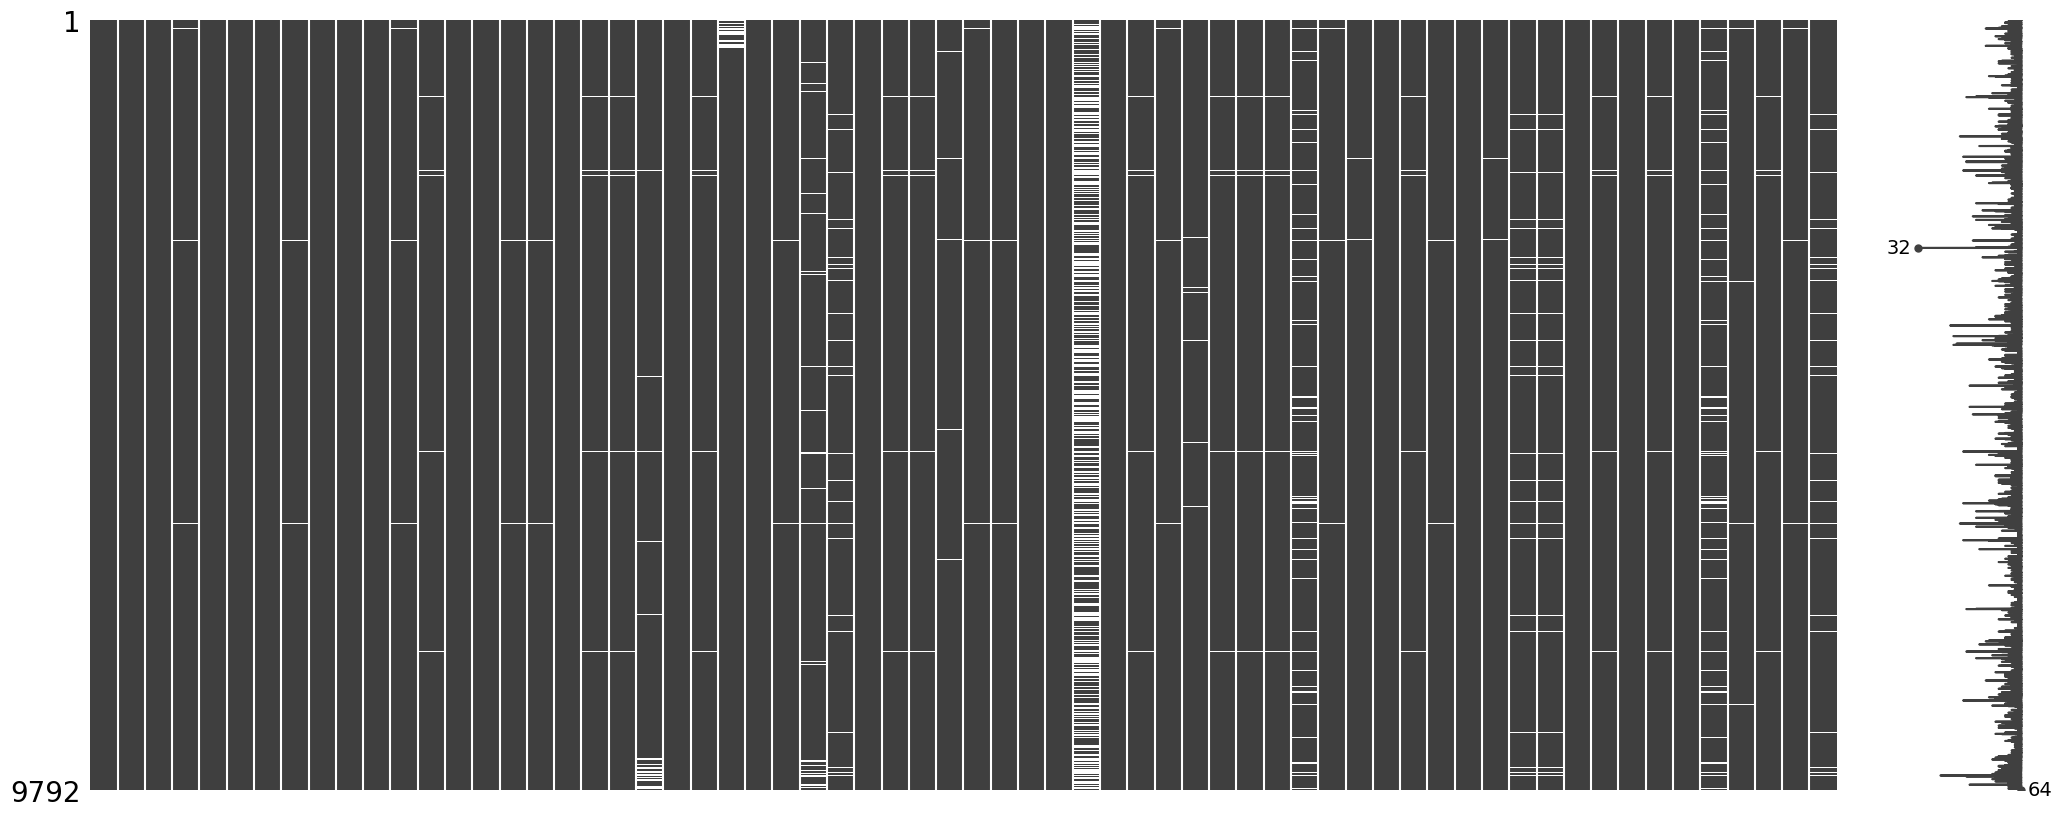

In [4]:
#Matrix for the Missing values
msno.matrix(data1)

In [5]:
#drop the null values
data_1st=data1.dropna()


In [6]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)


percentage of data loss after removing the null values:  51.29697712418301


In [7]:
#rename column values
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']

## 2. Data Imputation
### 2.1 Simple Imputation with mean

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
data1 = pd.DataFrame(imputer.fit_transform(data1), columns=data1.columns)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROA            9792 non-null   float64
 1   TDTA           9792 non-null   float64
 2   WCTA           9792 non-null   float64
 3   CAAL           9792 non-null   float64
 4   DIR            9792 non-null   float64
 5   REL            9792 non-null   float64
 6   EBIT           9792 non-null   float64
 7   BV             9792 non-null   float64
 8   ATR            9792 non-null   float64
 9   ETA            9792 non-null   float64
 10  GPEIFE         9792 non-null   float64
 11  GPL            9792 non-null   float64
 12  GPDS           9792 non-null   float64
 13  GPI            9792 non-null   float64
 14  LGPD           9792 non-null   float64
 15  GPDL           9792 non-null   float64
 16  TATL           9792 non-null   float64
 17  GPA            9792 non-null   float64
 18  Revenue 

## 3. Data Standardization

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Cheching for Data Imbalance

In [10]:
# target feature 'class' Count
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9277, 65)
class 1: (515, 65)


### 4.1 Data Balancing
#### SMOTE Oversampling

In [11]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train,y_train)

print('Original dataset shape', X_train)
print('Resample dataset shape', y_train)

Original dataset shape [[ 7.43364746e-02  1.69020216e-02 -1.27352989e-02 ... -1.70830005e-02
  -6.72322897e-02 -6.22019285e-02]
 [-3.46724048e-01  2.16147392e-03 -1.13590519e-03 ... -1.69662444e-02
  -7.68184099e-02 -7.31949567e-02]
 [ 1.06873679e-01 -9.92452834e-02  5.97625342e-02 ... -1.74202996e-02
  -2.42039691e-05 -7.83160350e-02]
 ...
 [ 1.52525048e-01  1.92370731e-02 -3.79667009e-03 ... -1.68705533e-02
  -8.18371703e-02 -6.87027266e-02]
 [-7.79810515e-02  4.31453027e-02 -1.79075787e-02 ... -1.64343540e-02
  -9.87599744e-02 -6.69139243e-02]
 [-6.32818972e-01  4.35161510e-02 -1.12376307e-01 ... -1.47707173e-02
  -1.15670926e-01 -8.13417206e-02]]
Resample dataset shape 0        0
1        0
2        0
3        0
4        0
        ..
14837    1
14838    1
14839    1
14840    1
14841    1
Name: class, Length: 14842, dtype: int64


## 5. Feature Selection

### 5.1 PCA Analysis

variance expalined: [9.54213937e-01 3.82919909e-02 3.72044103e-03 1.01267404e-03
 8.80037335e-04 7.01502403e-04 2.68780644e-04 2.20864192e-04
 1.64069045e-04 1.47007687e-04 8.25109866e-05 6.19005813e-05
 3.76455485e-05 3.42877169e-05 2.20916475e-05 1.96969082e-05
 1.65195951e-05 1.55641768e-05 1.43641263e-05 1.40869520e-05
 1.12753292e-05 8.03807639e-06 6.30091388e-06 6.16502044e-06
 5.69034159e-06 4.82742787e-06 3.13400504e-06 2.50940593e-06
 2.15658481e-06 1.53744220e-06 1.47048253e-06 1.40384653e-06
 1.21016495e-06 1.00252090e-06 5.29332245e-07 4.90820262e-07
 3.66130526e-07 3.22996197e-07 3.15755707e-07 2.42663545e-07
 1.79825640e-07 1.66293879e-07 1.56273058e-07 1.39763813e-07
 1.07584031e-07 9.13564959e-08 8.08699472e-08 6.64052191e-08
 2.08598992e-08 1.34088084e-08 6.26753555e-09 3.57092160e-09
 2.44955793e-09 1.56561129e-09 8.38546999e-10 7.28299521e-10
 3.41869608e-10 1.55608870e-10 6.07438848e-11 2.76237787e-11
 1.05094900e-12 9.43968912e-15 5.62985728e-33 5.62985728e-33]
var

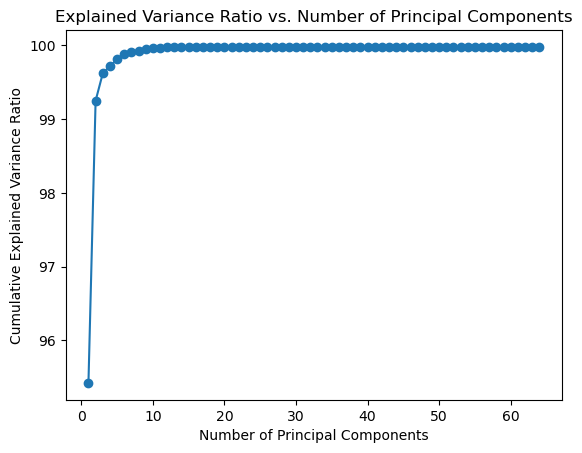

In [12]:
from sklearn.decomposition import PCA
# PCA Analysis for all components of train data
pca = PCA(n_components=64)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

variance expalined: [9.54271219e-01 3.82942897e-02 3.72066438e-03 1.01273484e-03
 8.80090165e-04 7.01544515e-04 2.68796779e-04 2.20877450e-04
 1.64078894e-04 1.47016512e-04]
variance : [95.43 99.26 99.63 99.73 99.82 99.89 99.92 99.94 99.96 99.97]


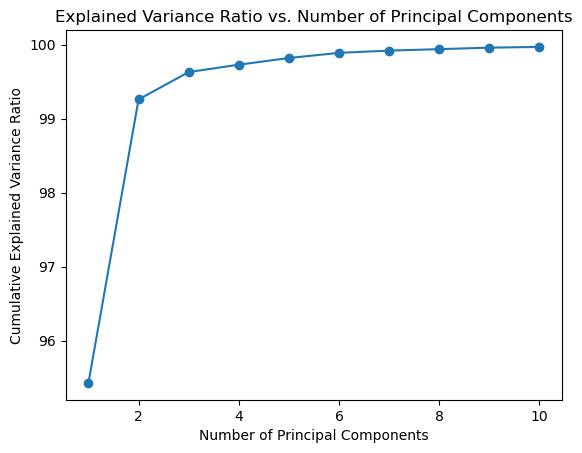

In [14]:
# PCA Analysis with 10 components of train data
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()
 

## 6. Machine Learning Classifications

### 6.1 Logistic Regression

In [15]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression() 
LR.fit(X_train,y_train) 
LR_pred= LR.predict(X_test) 
#train and test accuracy scores
trACC_LR=LR.score(X_train,y_train) 
tesACC_LR=LR.score(X_test,y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #91.11


Train Accuracy for Logistic Regression :  0.6201994340385393
Test Accuracy for Logistic Regression :  0.9111791730474732 



In [16]:
#Confusion matrix
LR_cf = confusion_matrix(y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf)

#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 

confusion matrix for LR:
 [[1775   81]
 [  93   10]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1856
           1       0.11      0.10      0.10       103

    accuracy                           0.91      1959
   macro avg       0.53      0.53      0.53      1959
weighted avg       0.91      0.91      0.91      1959



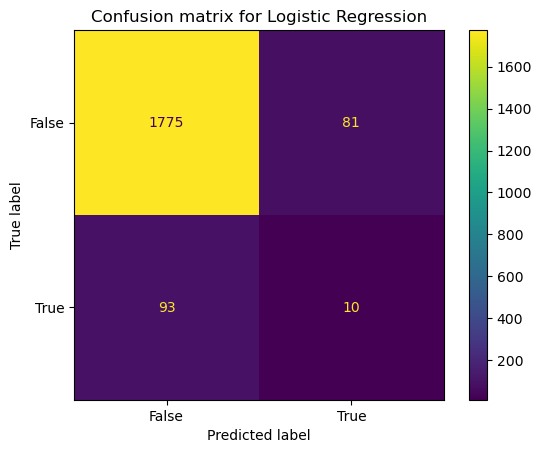

In [17]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train) 
DT_pred = DT.predict(X_test)
#train and test accuracies
trACC_DT=DT.score(X_train,y_train) 
tesACC_DT=DT.score(X_test,y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #81.98


Train Accuracy for Decision Tree  :  1.0
Test Accuracy for Decision Tree :  0.819806023481368 



In [20]:
#Confusion Matrix
DT_cf = confusion_matrix(y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 

#Classification report of Confusion matrix 
DT_matrix = classification_report(y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[1591  265]
 [  88   15]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      1856
           1       0.05      0.15      0.08       103

    accuracy                           0.82      1959
   macro avg       0.50      0.50      0.49      1959
weighted avg       0.90      0.82      0.86      1959



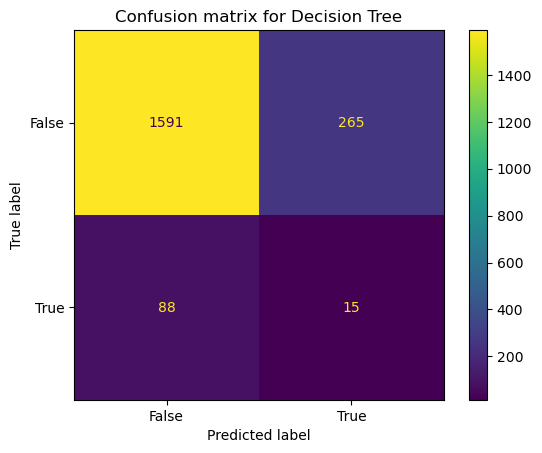

In [21]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.4 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train) 
RF_pred = RF.predict(X_test)
#train and test accuracies
trACC_RF=RF.score(X_train,y_train) 
tesACC_RF=RF.score(X_test,y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #94.74


Train Accuracy for Random Forest  :  1.0
Test Accuracy for Random Forest :  0.9474221541602859 



In [23]:
#Confusion Matrix
RF_cf = confusion_matrix(y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 

#Classification report of confusion matrix 
RF_matrix = classification_report(y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 


confusion matrix for RF:
 [[1856    0]
 [ 103    0]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1856
           1       0.00      0.00      0.00       103

    accuracy                           0.95      1959
   macro avg       0.47      0.50      0.49      1959
weighted avg       0.90      0.95      0.92      1959



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


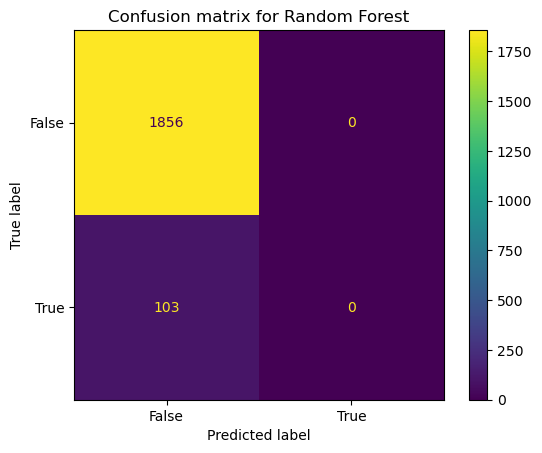

In [24]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
#train and test accuracies
trACC_GB=GB.score(X_train,y_train) 
tesACC_GB=GB.score(X_test,y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") #88.97


Train Accuracy for Gradient Boost  :  0.7172213987333244
Test Accuracy for Gradient Boost :  0.889739663093415 



In [26]:
#Confusion Matrix
GB_cf = confusion_matrix(y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 

#Classification report of Confusion matrix
GB_matrix = classification_report(y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix) 


confusion matrix for GB:
 [[1742  114]
 [ 102    1]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1856
           1       0.01      0.01      0.01       103

    accuracy                           0.89      1959
   macro avg       0.48      0.47      0.48      1959
weighted avg       0.90      0.89      0.89      1959



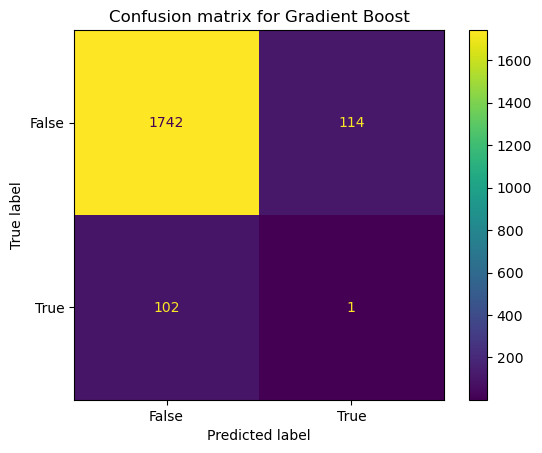

In [27]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classifier (XGBoosting)

In [28]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
#train and test Accuracies
trACC_XGB=XGB.score(X_train,y_train) 
tesACC_XGB=XGB.score(X_test,y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #91.93


Train Accuracy for Xtreme Gradient Boost  :  0.7649238647082603
Test Accuracy for Xtreme Gradient Boost :  0.919346605410924 



In [29]:
#Confusion Matrix
XGB_cf = confusion_matrix(y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 

#Classification report of Confusion matrix 
XGB_matrix = classification_report(y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix)


confusion matrix for XGB:
 [[1798   58]
 [ 100    3]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1856
           1       0.05      0.03      0.04       103

    accuracy                           0.92      1959
   macro avg       0.50      0.50      0.50      1959
weighted avg       0.90      0.92      0.91      1959



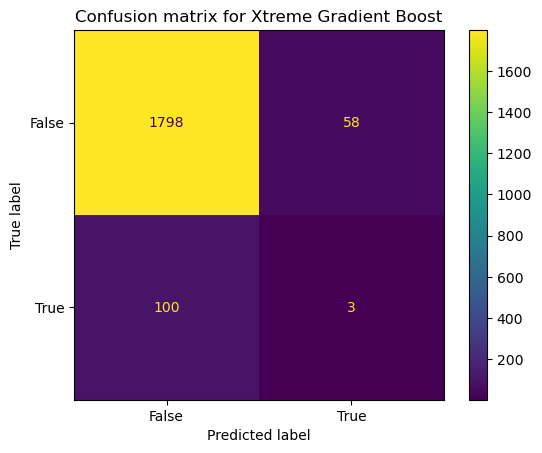

In [30]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
#train and test Accuracies
trACC_svc=svc.score(X_train,y_train) 
tesACC_svc=svc.score(X_test,y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #92.59


Train Accuracy for SVM  :  0.6441854197547501
Test Accuracy for SVM :  0.9259826442062277 



In [32]:
#Confusion Matrix
svc_cf = confusion_matrix(y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf) 

#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix)

confusion matrix for SVM:
 [[1813   43]
 [ 102    1]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1856
           1       0.02      0.01      0.01       103

    accuracy                           0.93      1959
   macro avg       0.48      0.49      0.49      1959
weighted avg       0.90      0.93      0.91      1959



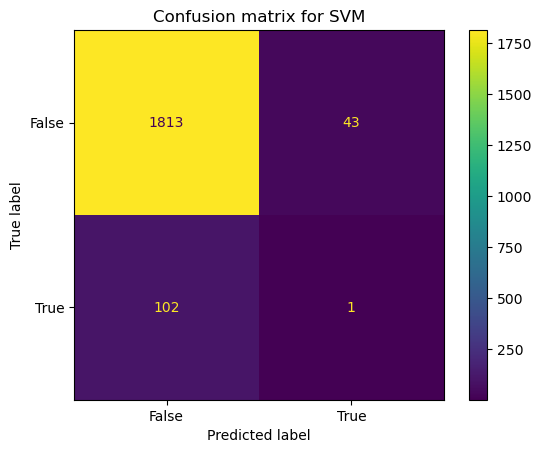

In [33]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [34]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_prob)

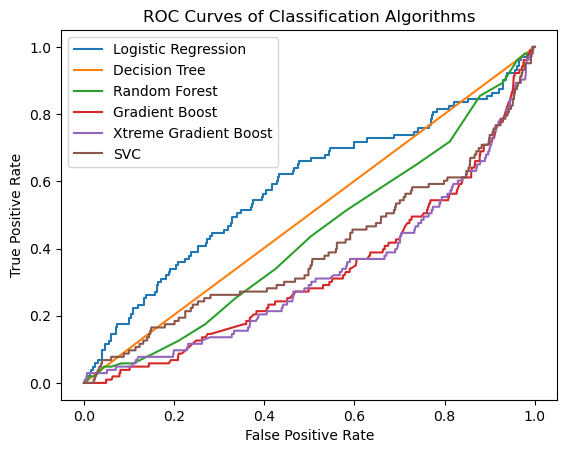

In [35]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

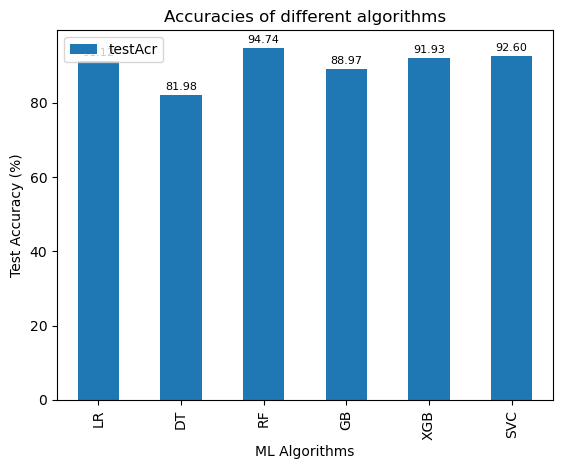

In [36]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.show()